In [1]:
import random

In [44]:
random.seed('hola')
random.random()

0.7341683748003461

In [92]:
# Como hacer una eleccion entre dos opciones por igual:

opciones = ['par', 'impar']
if random.random() < 0.1:
    print (opciones[0])
else:
    print (opciones[1])

impar


In [55]:
import numpy as np
import seaborn as sns

In [94]:
# Vamos a repetir el problema de pedirle a 4 personas que digan si su DNI es par o impar.

def contar_n_muestras(tamano_muestra, opciones = ["par","impar"], buscado = "par"):
    resultado = np.random.choice(opciones,tamano_muestra)
    coincidencias = resultado == buscado
    return coincidencias.sum()

contar_n_muestras(4)


4

In [99]:
# Vamos a repetir el problema X veces tomando la paridad de N elementos

def hacer_n_experinmentos(tamano_muestra, nro_experimentos, opciones = ["par","impar"], buscado = "par"):
    resultado = []
    for i in range(nro_experimentos):
        experimento = contar_n_muestras(tamano_muestra, opciones = opciones, buscado = buscado)
        resultado.append(experimento)
    return resultado

hacer_n_experinmentos(4,10)

[2, 1, 3, 1, 2, 1, 2, 3, 3, 3]

C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

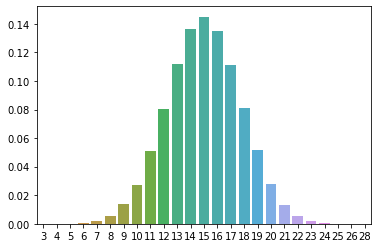

In [114]:
# Ahora queremos ver como queda eso graficado

nro_muestras = 30
nro_experimentos = 100000
exp = hacer_n_experinmentos(nro_muestras,nro_experimentos)
unique, counts = np.unique(exp, return_counts=True)
sns.barplot(unique, counts/counts.sum())

In [115]:
largos = [14.8, 13.8, 14.8, 14.8, 13.9, 15.1, 14.1, 14.2, 17.2, 14.6, 14.4, 13.9, 13.8, 14.4, 14.3, 17.3, 16.4, 13.2, 12.7, 15, 14.1, 16.3, 14.6, 13.7, 14.8, 15.5, 14.6, 14.5, 14.6]

In [116]:
len(largos)

29

In [117]:
np.mean(largos)

14.668965517241382

[14.8 13.8 14.8 14.8 13.9 15.1 14.1 14.2 17.2 14.6 14.4 13.9 13.8 14.4
 14.3 17.3 16.4 13.2 12.7 15.  14.1 16.3 14.6 13.7 14.8 15.5 14.6 14.5
 14.6]


C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

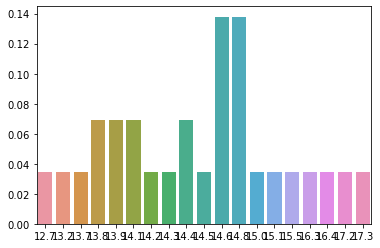

In [119]:
data = np.array(largos)
print (data)
unique, counts = np.unique(data, return_counts=True)
sns.barplot(unique, counts/counts.sum())

[12.7 13.2 13.7 13.8 13.8 13.9 13.9 14.1 14.1 14.2 14.3 14.4 14.4 14.5
 14.6 14.6 14.6 14.6 14.8 14.8 14.8 14.8 15.  15.1 15.5 16.3 16.4 17.2
 17.3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


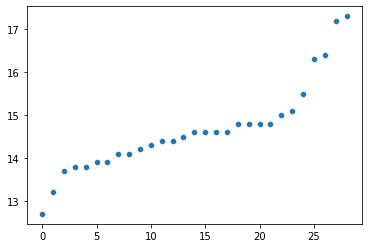

In [122]:
data.sort()
print(data)
x = np.arange(len(data))
print (x)
grafico = sns.scatterplot(x,data)

La probabilidad de que el valor este entre 0 y 100 es 100.0%


C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


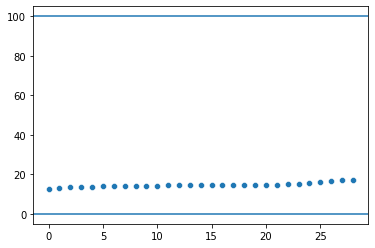

In [133]:
# Cual es la probabilidad de que un lapiz mida entre 14 y 15 cm

cota_sup = 100
cota_inf = 0

condicion = (cota_inf < data) & (data <= cota_sup)
# La probabilidad son los caso favorables sobre los totales
print (f'La probabilidad de que el valor este entre {cota_inf} y {cota_sup} es {condicion.sum()/len(condicion)*100}%')
grafico = sns.scatterplot(x,data)
grafico.axhline(cota_sup)
grafico.axhline(cota_inf)

C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


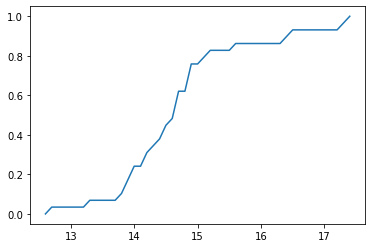

In [134]:
# Vamos a contruir la probabilidad acumulada
paso = 0.1

probabilidad_acumulada = []
limite_inf = data.min()-paso

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (limite_inf < data) & (data <= deslizador)
    probabilidad_acumulada.append(condicion.sum()/len(condicion))
    
grafico = sns.lineplot(np.arange(data.min()-paso,data.max()+paso,paso),probabilidad_acumulada)

C:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


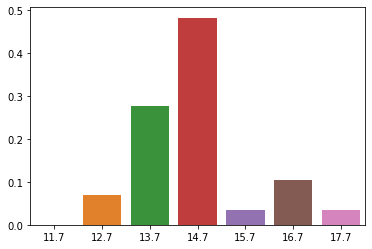

In [138]:
# Vamos a construir la densidad de probabilidad
paso = 1

densidad_probabilidad = []
for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (deslizador - paso/2 < data) & (data <= deslizador + paso/2)
    densidad_probabilidad.append(condicion.sum()/len(condicion)) 
    
grafico = sns.barplot(np.arange(data.min()-paso,data.max()+paso,paso),densidad_probabilidad)